In [1]:
import pandas as pd
import converting_angle 

In [2]:
rilievo = pd.read_csv("diagrammaSolare/rilievo_Diagramma_Solare.csv", sep=";")
rilievo.head()

,Azimuth,Altezza solare
0,0.0,9.0
1,11.0,9.0
2,11.0,6.8
3,19.0,6.8
4,22.0,7.0


In [3]:
altezzaSolare = pd.read_csv("diagrammaSolare/altezzaSolare.csv", sep=";" , index_col=0)

In [4]:
altezzaSolare.index = pd.to_datetime(altezzaSolare.index).strftime("%H:%M")

c:\Users\nicol\miniconda3\envs\myenv\lib\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname CET identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


In [5]:
altezzaSolare = altezzaSolare.applymap(converting_angle.transform_height) # na_action='ignore' not working

In [6]:
altezzaSolare.head()

,17 Gen,16 Feb,16 Mar,15 Apr,15 Mag,11 Giu,17 Lug,16 Ago,15 Set,15 Ott,14 Nov,10 Dic
Ora,,,,,,,,,,,,
03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
05:00,NaN,NaN,NaN,NaN,1.633333,4.433333,2.133333,NaN,NaN,NaN,NaN,NaN
06:00,NaN,NaN,NaN,4.100000,11.383333,13.933333,11.633333,6.600000,0.516667,NaN,NaN,NaN
07:00,NaN,NaN,4.6,14.466667,21.616667,24.033333,21.716667,16.883333,10.916667,4.1,NaN,NaN


In [7]:
angoloAzimutale = pd.read_csv("diagrammaSolare/angoloAzimutale.csv", sep=";" , index_col=0)
angoloAzimutale.index = pd.to_datetime(angoloAzimutale.index).strftime("%H:%M")
angoloAzimutale = angoloAzimutale.applymap(converting_angle.transform_azimut) # na_action='ignore' not working

angoloAzimutale.head()

c:\Users\nicol\miniconda3\envs\myenv\lib\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname CET identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


,17 Gen,16 Feb,16 Mar,15 Apr,15 Mag,11 Giu,17 Lug,16 Ago,15 Set,15 Ott,14 Nov,10 Dic
Ora,,,,,,,,,,,,
03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
05:00,NaN,NaN,NaN,NaN,64.416667,60.966667,60.883333,NaN,NaN,NaN,NaN,NaN
06:00,NaN,NaN,NaN,80.583333,74.833333,71.116667,71.216667,76.650000,85.716667,NaN,NaN,NaN
07:00,NaN,NaN,97.766667,91.300000,85.116667,81.100000,81.300000,87.183333,96.583333,106.316667,NaN,NaN


In [8]:
import matplotlib.pyplot as plt

In [9]:
import numpy as np

In [10]:
x = angoloAzimutale["17 Gen"].array.to_numpy()

In [11]:
angoloAzimutale.loc['03:00']

17 Gen   NaN
16 Feb   NaN
16 Mar   NaN
15 Apr   NaN
15 Mag   NaN
11 Giu   NaN
17 Lug   NaN
16 Ago   NaN
15 Set   NaN
15 Ott   NaN
14 Nov   NaN
10 Dic   NaN
Name: 03:00, dtype: float64

In [12]:
x = np.insert(x, 0, 0)
x = np.append(x, 0)
x

array([  0.        ,          nan,          nan,          nan,
                nan,          nan, 121.26666667, 132.58333333,
       145.08333333, 158.86666667, 173.7       , 188.9       ,
       203.58333333, 217.16666667, 229.45      ,          nan,
                nan,          nan,          nan,          nan,
         0.        ])

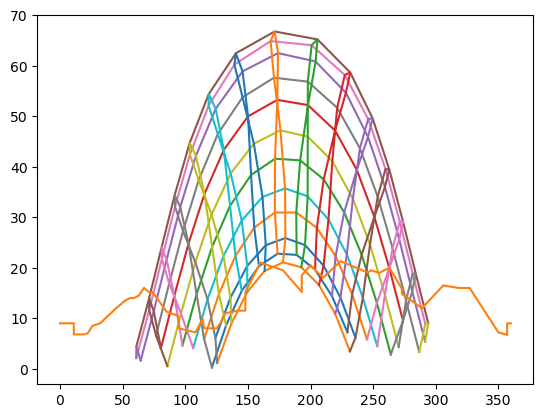

In [13]:

for col in angoloAzimutale.columns:
    x = angoloAzimutale.get(col).array.to_numpy()
    #x = np.insert(x, 0, 0)
    #x = np.append(x, 0)

    y = altezzaSolare.get(col).array.to_numpy()
    #y = np.insert(y, 0, 0)
    #y = np.append(y, 0)

    plt.plot(x, y)

for hour in angoloAzimutale.index:
    x = angoloAzimutale.loc[hour]
    y = altezzaSolare.loc[hour]

    plt.plot(x, y)

plt.plot(rilievo["Azimuth"], rilievo["Altezza solare"])


In [14]:
from scipy import interpolate

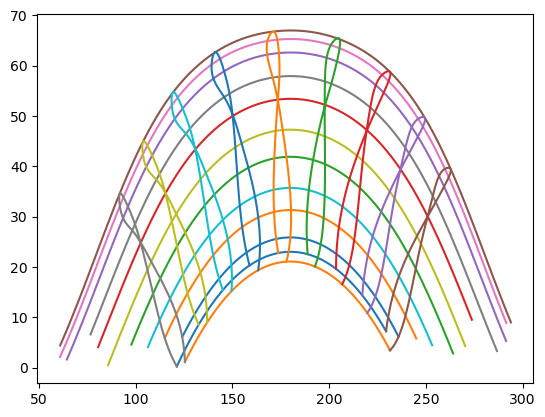

In [15]:
for col in angoloAzimutale.columns:
    x = angoloAzimutale.get(col).dropna().array.to_numpy()
    #x = np.insert(x, 0, 0)
    #x = np.append(x, 360)

    y = altezzaSolare.get(col).dropna().array.to_numpy()
    #y = np.insert(y, 0, 0)
    #y = np.append(y, 0)
    data = np.array(list(zip(x,y)))
    


    tck,u = interpolate.splprep(data.transpose(), s=0)
    unew = np.arange(0, 1.01, 0.01)
    out = interpolate.splev(unew, tck, der=0)


    plt.plot(out[0], out[1])

for hour in angoloAzimutale.index:
    x = angoloAzimutale.loc[hour]
    y = altezzaSolare.loc[hour]
    data = np.array(list(zip(x,y)))
    
    tck,u = interpolate.splprep(data.transpose(), s=0)
    unew = np.arange(0, 1.01, 0.01)
    out = interpolate.splev(unew, tck, der=0)


    plt.plot(out[0], out[1])


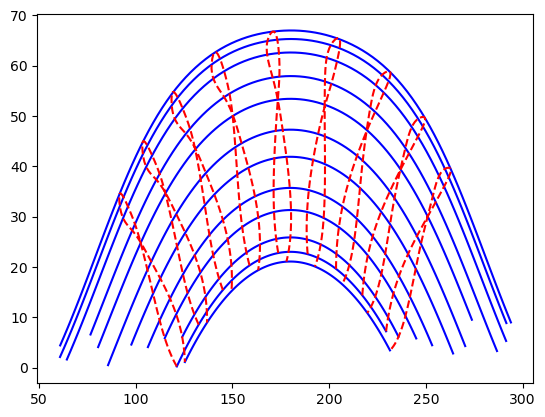

In [16]:
fig, ax = plt.subplots(1,1)

for col in angoloAzimutale.columns:
    x = angoloAzimutale.get(col).dropna().array.to_numpy()
    #x = np.insert(x, 0, x[0])
    #x = np.append(x, x[-1])

    y = altezzaSolare.get(col).dropna().array.to_numpy()
    #y = np.insert(y, 0, 0)
    #y = np.append(y, 0)
    data = np.array(list(zip(x,y)))
    


    tck,u = interpolate.splprep(data.transpose(), s=0)
    unew = np.arange(0, 1.01, 0.01)
    out = interpolate.splev(unew, tck, der=0)


    ax.plot(out[0], out[1], "b")

for hour in angoloAzimutale.index:
    x = angoloAzimutale.loc[hour]
    y = altezzaSolare.loc[hour]
    data = np.array(list(zip(x,y)))
    
    tck,u = interpolate.splprep(data.transpose(), s=0)
    unew = np.arange(0, 1.01, 0.01)
    out = interpolate.splev(unew, tck, der=0)


    ax.plot(out[0], out[1], "r--")



#plt.savefig("export/diagrammaSolare.pdf")


In [17]:
angoloAzimutale.loc[angoloAzimutale.index[2]].dropna().array.to_numpy()

array([64.41666667, 60.96666667, 60.88333333])

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

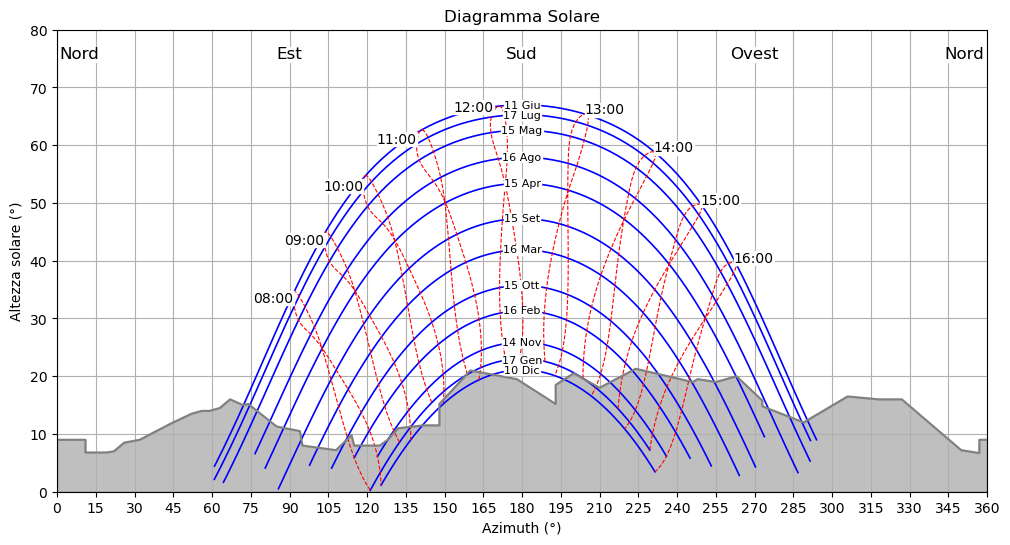

In [20]:
fig, ax = plt.subplots(1,1, figsize=(12,6))

for col in angoloAzimutale.columns:
    x = angoloAzimutale.get(col).dropna().array.to_numpy()
    #x = np.insert(x, 0, x[0])
    #x = np.append(x, x[-1])

    y = altezzaSolare.get(col).dropna().array.to_numpy()
    #y = np.insert(y, 0, 0)
    #y = np.append(y, 0)
    data = np.array(list(zip(x,y)))
    


    tck,u = interpolate.splprep(data.transpose(), s=0)
    unew = np.arange(0, 1.01, 0.01)
    out = interpolate.splev(unew, tck, der=0)


    ax.plot(out[0], out[1], "b", linewidth=1.2)
    ax.text(180, out[1][len(unew)//2], f"{col}", 
        horizontalalignment='center', verticalalignment='center', fontsize=8,
        bbox=dict(alpha=1, color="white", pad=0))

for hour in angoloAzimutale.index:
    x = angoloAzimutale.loc[hour]
    y = altezzaSolare.loc[hour]
    data = np.array(list(zip(x,y)))
    
    tck,u = interpolate.splprep(data.transpose(), s=0)
    unew = np.arange(0, 1.01, 0.01)
    out = interpolate.splev(unew, tck, der=0)


    ax.plot(out[0], out[1], "r--", linewidth=0.8)

    hor_align = "right" if hour in altezzaSolare.index[0:10] else "left" #Fino a mezzogiorno
    ax.text(out[0][len(unew)//2], out[1][len(unew)//2], f"{hour}",  
        horizontalalignment=hor_align,
        fontsize=10,
        bbox=dict(alpha=1, color="white", pad=0))      

ax.plot(rilievo["Azimuth"], rilievo["Altezza solare"], color="gray")
ax.fill_between(rilievo["Azimuth"], rilievo["Altezza solare"], color="gray", alpha=.5)

ax.set_ylim(0,80)
ax.set_xlim(0,360)
ax.set_title("Diagramma Solare", fontsize=12)
ax.set_xlabel("Azimuth (°)")
ax.set_ylabel("Altezza solare (°)")
ax.grid("both")
ax.set_xticks(np.arange(0,361,15))


ax.text(1, 75, "Nord",  horizontalalignment="left",  fontsize=12,
    bbox=dict(alpha=1, color="white", pad=0)) 
ax.text(90, 75, "Est",  horizontalalignment="center",  fontsize=12,
    bbox=dict(alpha=1, color="white", pad=0))
ax.text(180, 75, "Sud",  horizontalalignment="center", fontsize=12,
    bbox=dict(alpha=1, color="white", pad=0))
ax.text(270, 75, "Ovest",  horizontalalignment="center", fontsize=12,
    bbox=dict(alpha=1, color="white", pad=0))
ax.text(359, 75, "Nord",  horizontalalignment="right", fontsize=12,
    bbox=dict(alpha=1, color="white", pad=0))


#plt.savefig("export/diagrammaSolare.pdf")


In [19]:
altezzaSolare.index[0:10]


Index(['03:00', '04:00', '05:00', '06:00', '07:00', '08:00', '09:00', '10:00',
       '11:00', '12:00'],
      dtype='object', name='Ora')